#4th-order quadrature example

Ported from the MATLAB file `dsexample4.m`, written by R. Schreier.

Preliminary code to set-up IPython:

In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
from pylab import *

Import the `deltasigma` module.

In [2]:
import deltasigma as ds

## ADC specifications

Specify the parameters of the the ADC design:

In [3]:
order = 4
osr = 32
M = 8
NG = -50
ING = -10
f0 = 1 / 16
quadrature = True
form = 'PFB'
nlev = M + 1
z0 = np.exp(1j*2*np.pi*f0)
bw = 1./osr
delta = 2
FullScale = M

ADC specifications up to now:

In [4]:
adc = {}
adc['order'] = order
adc['osr'] = osr
adc['M'] = M
adc['f0'] = f0
adc['quadrature'] = quadrature
adc['form'] = form

## Choosing the NTF and realization... 

In [5]:
ntf0 = ds.synthesizeQNTF(order, osr, f0, NG, ING)
print('ntf0 = \n')
print(ds.pretty_lti(ntf0))

ntf0 = 

  (z - 0.888 - 0.4598j) (z - 0.9239 + 0.3827j) (z - 0.9239 - 0.3827j) (z - 0.953 - 0.3028j)  
---------------------------------------------------------------------------------------------
 (z - 0.5739 - 0.5699j) (z - 0.5913 - 0.2449j) (z - 0.6731 + 0.2788j) (z - 0.8088 - 0.0028j) 


In [6]:
ABCD = ds.realizeQNTF(ntf0, form, quadrature)
adc['ABCD'] = ABCD.copy()
print('ABCD matrix: \n')
print(ABCD)

ABCD matrix: 

[[ 0.88803720 +4.59771611e-01j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.05160829 +0.00000000e+00j  0.05160829 +1.73472348e-18j]
 [ 0.60725927 +7.94503732e-01j  0.95304475 +3.02829501e-01j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.32296443 -5.55111512e-17j]
 [ 0.00000000 +0.00000000e+00j  0.94589279 +3.24479322e-01j
   0.92387953 +3.82683432e-01j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.91615063 +1.24900090e-16j]
 [ 0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.92387953 -3.82683432e-01j
   0.00000000 +0.00000000e+00j  0.17778533 +0.00000000e+00j]
 [ 0.00000000 -0.00000000e+00j  0.00000000 -0.00000000e+00j
  -0.99349829 -1.13847053e-01j -0.74054592 -6.72005754e-01j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j]]


## Calculate the STF

This also recalculates the NTF, which is the same as before.

In [7]:
ntf, stf = ds.calculateTF(ABCD)
print('ntf = \n')
print(ds.pretty_lti(ntf))
print('\n\nstf = \n')
print(ds.pretty_lti(stf))
# save ADC parameters
adc['ntf'] = ntf
adc['stf'] = stf

ntf = 

  (z - 0.888 - 0.4598j) (z - 0.9239 + 0.3827j) (z - 0.9239 - 0.3827j) (z - 0.953 - 0.3028j)  
---------------------------------------------------------------------------------------------
 (z - 0.5739 - 0.5699j) (z - 0.5913 - 0.2449j) (z - 0.6731 + 0.2788j) (z - 0.8088 - 0.0028j) 


stf = 

                                                       (z - 0.9239 + 0.3827j)                                   
(-0.0107 - 0.0505j)---------------------------------------------------------------------------------------------
                    (z - 0.5739 - 0.5699j) (z - 0.5913 - 0.2449j) (z - 0.6731 + 0.2788j) (z - 0.8088 - 0.0028j) 


//anaconda/lib/python2.7/site-packages/scipy/signal/filter_design.py:1055: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


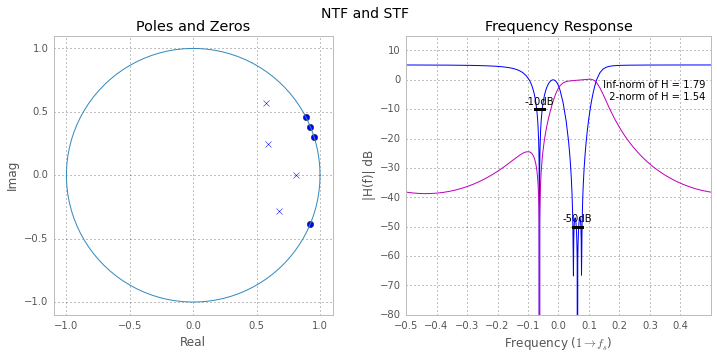

In [8]:
figure(figsize=(12,8))
ds.DocumentNTF(ABCD, osr=32, f0=1./16, quadrature=True);

## Time-domain simulations

/Users/joseph/work/repos/python-deltasigma/deltasigma/_figureMagic.py:111: UserWarning: figureMagic() got xLab=2, but xLab is not implemented and will be ignored.
  'will be ignored.') % xLab)
/Users/joseph/work/repos/python-deltasigma/deltasigma/_figureMagic.py:114: UserWarning: figureMagic() got yLab=2, but xLab is not implemented and will be ignored.
  'will be ignored.') % yLab)


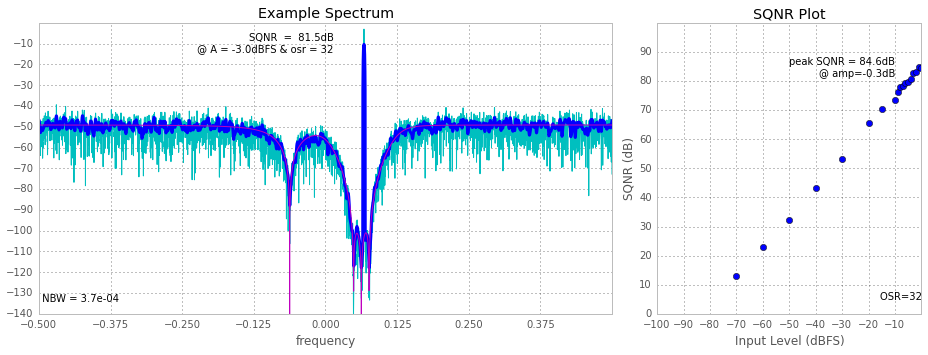

In [9]:
#setup the figure
figure(figsize=(13, 5))
subplot2grid((1, 3), (0, 0), colspan=2)
# spectrum
ds.PlotExampleSpectrum(ntf, M, osr, f0, quadrature)
title('Example Spectrum')
# SNR simulation
subplot2grid((1, 3), (0, 2))
snr, amp = ds.simulateSNR(ABCD, osr, None, f0, nlev)
plot(amp, snr, 'ob')
hold(True)
ds.figureMagic((-100, 0), 10, 2, (0, 100), 10, 2)
xlabel('Input Level (dBFS)')
ylabel('SQNR (dB)')
peak_snr, peak_amp = ds.peakSNR(snr, amp)
adc['peak_snr'] = peak_snr
msg = 'peak SQNR = %4.1fdB  \n@ amp=%4.1fdB  ' % (peak_snr, peak_amp)
text(peak_amp - 10, peak_snr, msg, ha='right', va='center')
msg = 'OSR=%d ' % osr
text(0, 5, msg, ha='right')
title('SQNR Plot')
tight_layout()

## ADC parameters

In [10]:
for k in adc:
    print('%s:' % k)
    print('\t'+str(adc[k]))

f0:
	0.0625
ABCD:
	[[ 0.88803720 +4.59771611e-01j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.05160829 +0.00000000e+00j  0.05160829 +1.73472348e-18j]
 [ 0.60725927 +7.94503732e-01j  0.95304475 +3.02829501e-01j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.32296443 -5.55111512e-17j]
 [ 0.00000000 +0.00000000e+00j  0.94589279 +3.24479322e-01j
   0.92387953 +3.82683432e-01j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.91615063 +1.24900090e-16j]
 [ 0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j
   0.00000000 +0.00000000e+00j  0.92387953 -3.82683432e-01j
   0.00000000 +0.00000000e+00j  0.17778533 +0.00000000e+00j]
 [ 0.00000000 -0.00000000e+00j  0.00000000 -0.00000000e+00j
  -0.99349829 -1.13847053e-01j -0.74054592 -6.72005754e-01j
   0.00000000 +0.00000000e+00j  0.00000000 +0.00000000e+00j]]
stf:
	(array([ 0.92387953-0.38268343j]), array([ 0.57387778+0.5699217j ,  0

## Effect of example I/Q mismatch

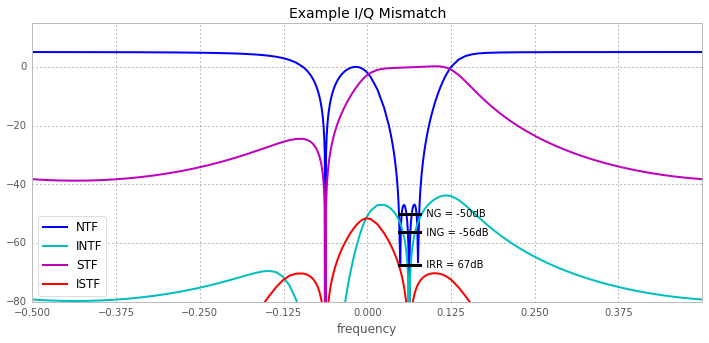

In [11]:
from scipy.signal import freqz
nd = ds._utils._get_num_den
figure(figsize=(12, 5))
ABCDr = ds.mapQtoR(ABCD)
ABCDr[1, -1] = 1.01 * ABCDr[1, -1]
H, G, HI, GI = ds.calculateQTF(ABCDr)
f = ds.ds_freq(osr, f0, quadrature)
w = 2 * np.pi * f
NTF = freqz(*nd(H), worN=w)[1]
INTF = freqz(*nd(HI), worN=w)[1]
STF = freqz(*nd(G), worN=w)[1]
ISTF = freqz(*nd(GI), worN=w)[1]
plot(f, ds.dbv(NTF), 'b', lw=2, label='NTF')
hold(True)
plot(f, ds.dbv(INTF), 'c', lw=2, label='INTF')
plot(f, ds.dbv(STF), 'm', lw=2, label='STF')
plot(f, ds.dbv(ISTF), 'r', lw=2, label='ISTF')
inband = (np.logical_and(f >= f0 - 0.5/osr, f <= f0 + 0.5/osr))
# NG LEVEL
ng = ds.dbp(np.mean(np.abs(NTF[inband])**2))
plot(f0 + 0.5*np.array((-1, 1))/osr, ng*np.array((1, 1)), 'k', lw=3)
msg = '  NG = %.0fdB ' % ng
text(f0 + 0.5/osr, ng, msg, ha='left', va='center')
# ING LEVEL
ing = ds.dbp(np.mean(np.abs(INTF[inband])**2))
plot([f0 - 0.5/osr, f0 +0.5/osr], [ing, ing], 'k', lw=3)
msg = '  ING = %.0fdB ' % ing
text(f0 + 0.5/osr, ing, msg, ha='left', va='center')
# IRR LEVEL
irr = np.min(ds.dbv(STF[inband]) - ds.dbv(ISTF[inband]))
plot([f0 - 0.5/osr, f0 + 0.5/osr], [-irr, -irr], 'k', lw=3)
msg = '  IRR = %.0fdB ' % irr
text(f0 + 0.5/osr, -irr, msg, ha='left', va='center')
ds.figureMagic((-0.5, 0.5), 2./16, 2, (-80, 15), 20, 2, None, 'Example I/Q Mismatch')
xlabel('frequency')
legend(loc=3);

##Further information about NTF synthesis

Please refer to `help(synthesizeNTF)` for detailed - and possibly more updated - documentation!

`help(synthesizeNTF)` as of writing:

**synthesizeQNTF**(order=4, OSR=64, f0=0.0, NG=-60, ING=-20, n_im=None)**

Synthesize a noise transfer function for a quadrature modulator.

**Parameters:**

order : *int, optional*
    The order of the modulator. Defaults to 4.

OSR : *int, optional*
    The oversampling ratio. Defaults to 64.

f0 : *float, optional*
    The center frequency, normalized such that $1 \rightarrow f_s$.
    Defaults to 0, ie to a low-pass modulator.

NG : *float, optional*
    The in-band noise gain, expressed in dB. Defaults to -60.

ING : *float, optional*
    The image-band noise gain, in dB. Defaults to -20.

n_im : *int, optional*
    The number of in-band image zeros, defaults to `floor(order/3)`.

**Returns:**

ntf : *(z, p, k) tuple*
    `ntf` is a zpk tuple containing the zeros, poles and the gain of the
    synthesized NTF.

.. note::

    From the Matlab Delta-Sigma Toobox:
    ALPHA VERSION:
    This function uses an experimental ad-hoc method that is
    neither optimal nor robust.

**Example:**

Fourth order quadrature modulator::

    from deltasigma import *
    order = 4
    osr = 32
    NG = -50
    ING = -10
    f0 = 1 / 16
    ntf0 = synthesizeQNTF(order, osr, f0, NG, ING)
    pretty_lti(ntf0)

**Returns:**

```
      (z - 0.888 - 0.4598j) (z - 0.9239 + 0.3827j) (z - 0.9239 - 0.3827j) (z - 0.953 - 0.3028j)  
      ---------------------------------------------------------------------------------------------
       (z - 0.5739 - 0.5699j) (z - 0.5913 - 0.2449j) (z - 0.6731 + 0.2788j) (z - 0.8088 - 0.0028j) 
       
```

In [12]:
#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%reload_ext version_information

%version_information numpy, scipy, matplotlib, deltasigma

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.4.0 x86_64 i386 64bit
numpy 1.9.2
scipy 0.16.0
matplotlib 1.4.3
deltasigma 0.2.2
Fri Aug 07 16:34:50 2015 CEST